In [1]:
import sys 
sys.path.append("../../")
from dna import *
import visualize_linear_dna as vl 
import visualize_circular_dna as vc

In [2]:
#pCMV-Target-AID construction
nCas9_AID_source = DNA(record="input/addgene_79620.gbk", project="nCas9_AID_source")
pCMV_ABE         = DNA(record="input/addgene_102919.gbk",project="pCMV_ABE")
frag_a = cropdna(pCMV_ABE,5257,8636)
frag_b = cropdna(nCas9_AID_source,3894,6477)
frag_c = cropdna(nCas9_AID_source,6449,9267)

#frag_a  = joindna(DNA("ATCAAGATGCTATAA"),cropdna(pCMV_ABE,5257,8636),DNA("GCACCGAAG")) 
#frag_b  = joindna(cropdna(nCas9_AID_source,3894,6477),)
#frag_c  = joindna(DNA("TTTAAACTCATTA"),cropdna(nCas9_AID_source,6449,9267))
#product = joindna(frag_a[25:],frag_b[25:],frag_c[28:])
#product = joindna(product)
#product.project = "Target-AID"
#product.writedna("pCMV-Target-AID.gbk")

In [3]:
frag_a  = joindna(DNA("ATCAAGATGCTATAA"),frag_a,DNA("GCACCGAAG")) 
frag_b  = joindna(DNA("GAGAGCCGCCACC"),frag_b)
frag_c  = joindna(frag_c, DNA("TAATGAGTTTAAA"))
frag_a.printdnaseq(whole=False,end_length=30)
frag_b.printdnaseq(whole=False,end_length=30)
frag_c.printdnaseq(whole=False,end_length=30)

5' ATCAAGATGCTATAATGAGTTTAAACCCGC...ATAGGGAGAGCCGCCACCATGGCACCGAAG 3'
3' TAGTTCTACGATATTACTCAAATTTGGGCG...TATCCCTCTCGGCGGTGGTACCGTGGCTTC 5'

5' GAGAGCCGCCACCATGGCACCGAAGAAGAA...GACTACGACGTGGATCATATCGTGCCCCAG 3'
3' CTCTCGGCGGTGGTACCGTGGCTTCTTCTT...CTGATGCTGCACCTAGTATAGCACGGGGTC 5'

5' CTACGACGTGGATCATATCGTGCCCCAGTC...ACAAGATCAAGATGCTATAATGAGTTTAAA 3'
3' GATGCTGCACCTAGTATAGCACGGGGTCAG...TGTTCTAGTTCTACGATATTACTCAAATTT 5'



In [4]:
frag_a = modifyends(frag_a,"{}/{}".format("*" * 25,"-" * 25), "{}/{}".format("-" * 25,"*" * 25))
frag_b = modifyends(frag_b,"{}/{}".format("*" * 25,"-" * 25), "{}/{}".format("-" * 28,"*" * 28))
frag_c = modifyends(frag_c,"{}/{}".format("*" * 28,"-" * 28), "{}/{}".format("-" * 25,"*" * 25))
frag_a.printdnaseq(whole=False,end_length=30)
frag_b.printdnaseq(whole=False,end_length=30)

5' ATCAAGATGCTATAATGAGTTTAAACCCGC...ATAGG------------------------- 3'
3' -------------------------GGGCG...TATCCCTCTCGGCGGTGGTACCGTGGCTTC 5'

5' GAGAGCCGCCACCATGGCACCGAAGAAGAA...GA---------------------------- 3'
3' -------------------------TTCTT...CTGATGCTGCACCTAGTATAGCACGGGGTC 5'



In [5]:
product = joindna(frag_a,frag_b,frag_c,topology="cricular",project="pCMV-Target-AID")

(<Figure size 216x25.2 with 1 Axes>,
 [(<matplotlib.axes._axes.Axes at 0x12a189050>, None)])

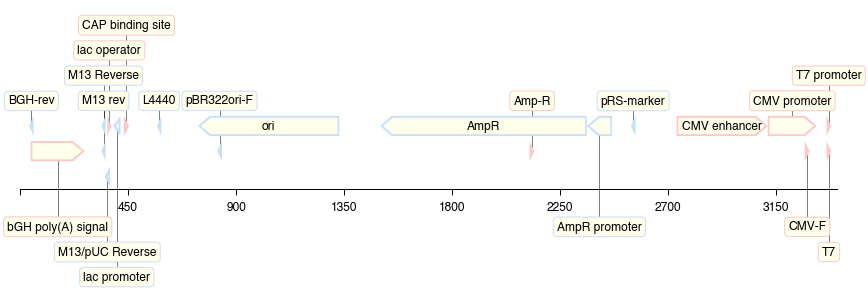

In [6]:
vl.visualize(frag_a)

(<Figure size 216x25.2 with 1 Axes>,
 [(<matplotlib.axes._axes.Axes at 0x12cbe8f50>, None)])

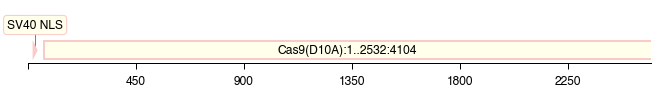

In [7]:
vl.visualize(frag_b)

(<Figure size 216x25.2 with 1 Axes>,
 [(<matplotlib.axes._axes.Axes at 0x12cc74950>, None)])

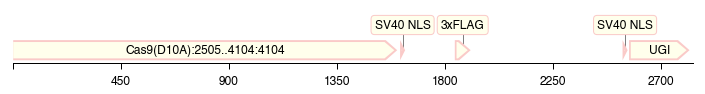

In [8]:
vl.visualize(frag_c)

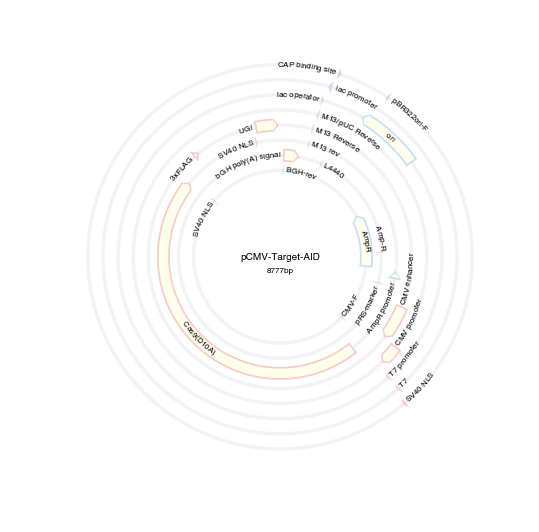

In [18]:
fig, _= vc.visualize(product)
fig.savefig("Target-AID.pdf")